In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Filepath ('.' = current directory)
path = 'Data'
os.chdir(path)

In [4]:
# Assign data types for import
jpg = 'jpg'

# Create list of files
files = [i for i in glob.glob('*.{}'.format(jpg))]

In [5]:
array = [[[174,156,109],
        [ 19,37,154],
        [38,98,14],
        [7,176,184]]]

In [6]:
new_array = np.array(array)

In [7]:
yellow = [255,255,0]
blue = [65,105,225]
green = [50,205,50]
red = [255,0,0]

In [8]:
templ = [[yellow,
         blue,
         green,
         red]]

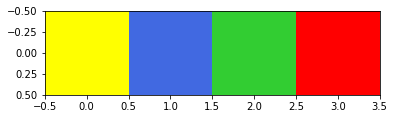

In [9]:
plt.imshow(templ)

In [10]:
photo = [[109,156,174],
            [154,37,19],
            [14,98,19],
            [184,176,7]]

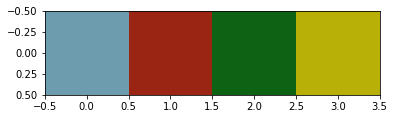

In [11]:
plt.imshow([photo])

In [12]:
scale = [[[166, 67, 33], [170, 89, 33], [177, 111, 33], [177, 127, 38], [183, 149, 43], [176, 146, 34], [180, 162, 36]], [[185, 180, 27], [180, 177, 24], [176, 176, 28], [162, 166, 29], [150, 159, 29], [151, 158, 29], [131, 140, 31]], [[172, 165, 31], [151, 139, 27], [139, 132, 27], [109, 113, 37], [98, 110, 45], [34, 65, 33], [57, 72, 65]], [[136, 154, 44], [115, 136, 41], [94, 126, 42], [79, 111, 38], [60, 89, 41], [29, 70, 36], [35, 46, 50]]]

In [13]:
measurement = [[[94, 116, 35], [86, 111, 24]]]

In [14]:
def scale_shape(array):
    np_scale = np.array(array)
    scale_1 = np.append(np_scale[0], np_scale[2]).reshape(1,14,3)
    scale_2 = np.append(np_scale[1], np_scale[3]).reshape(1,14,3)
    return scale_1, scale_2

In [15]:
def measurement_shape(measurement):
    np_measurement = np.array(measurement)
    measurement_1 = np.array(np_measurement[0][0])
    measurement_2 = np.array(np_measurement[0][1])
    return measurement_1, measurement_2

In [16]:
def calculate_distance(scale_1, scale_2, measurement_1, measurement_2):
    scale_1_dist = np.abs(scale_1 - measurement_1)
    scale_2_dist = np.abs(scale_2 - measurement_2)
    s1_dist_sum = [np.sum(x) for x in scale_1_dist[0]]
    s2_dist_sum = [np.sum(x) for x in scale_2_dist[0]]
    return s1_dist_sum, s2_dist_sum

In [24]:
def give_result(scale, measurement):
    np_scale = np.array(scale)
    scale_1 = np.append(np_scale[0], np_scale[2]).reshape(1,14,3)
    scale_2 = np.append(np_scale[1], np_scale[3]).reshape(1,14,3)
    np_measurement = np.array(measurement)
    measurement_1 = np.array(np_measurement[0][0])
    measurement_2 = np.array(np_measurement[0][1])
    scale_1_dist = np.abs(scale_1 - measurement_1)
    scale_2_dist = np.abs(scale_2 - measurement_2)
    s1_dist_sum = [np.sum(x) for x in scale_1_dist[0]]
    s2_dist_sum = [np.sum(x) for x in scale_2_dist[0]]
    df= pd.DataFrame()
    df['Measurement_1'] = s1_dist_sum
    df['Measurement_2'] = s2_dist_sum
    df['Measurement_sum'] = df['Measurement_1'] + df['Measurement_2'] 
    df['pH'] = [4.5, 5.0, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 8.0, 8.5, 9.0]
    value = df.loc[df['Measurement_sum'] == df['Measurement_sum'].min(), 'pH'].iloc[0]
    return value

In [25]:
result = give_result(scale, measurement)

In [26]:
result

7.5

In [29]:
np.array(measurement).shape

(1, 2, 3)